In [2]:
import findspark
findspark.init()

import pandas as pd
import pyspark

import numpy as np
import databricks.koalas as ks

### Funciones básicas

In [3]:
pser = pd.Series([1, 3, 5, np.nan, 6, 8])

# Crea una serie de Koalas con [1, 2, 3, 5, np.nan, 6, 8]

kser = ks.Series(pser)

In [6]:
## Ordena kser por el index
kser.sort_index(ascending  = True)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
pdf = pd.DataFrame({'A': np.random.rand(5),
                   'B': np.random.rand(5)})
# Genera un DataFrame de koalas con el pdf de pandas y llamálo kdf
kdf = ks.from_pandas(pdf)
type(kdf)

databricks.koalas.frame.DataFrame

### Visualización de datos

In [8]:
# Describe los datos de kdf
kdf.describe()

,A,B
count,5.000000,5.000000
mean,0.330631,0.443172
std,0.319263,0.386118
min,0.010233,0.051834
25%,0.117927,0.082033
50%,0.298871,0.432439
75%,0.390270,0.721283
max,0.835856,0.928271


In [9]:
# Ordena los datos de kdf por la columna B
kdf.sort_values(by ='B')

,A,B
4,0.117927,0.051834
0,0.010233,0.082033
1,0.390270,0.432439
3,0.835856,0.721283
2,0.298871,0.928271


In [10]:
# Transponer los datos
kdf.T

,0,1,2,3,4
A,0.010233,0.390270,0.298871,0.835856,0.117927
B,0.082033,0.432439,0.928271,0.721283,0.051834


### Selección

In [18]:
# Selecciona las variables A y B de kdf
kdf[['A', 'B']]

,A,B
0,0.010233,0.082033
1,0.390270,0.432439
2,0.298871,0.928271
3,0.835856,0.721283
4,0.117927,0.051834


In [19]:
# Selecciona las filas 1, 2 de kdf
kdf.loc[1:2]

,A,B
1,0.390270,0.432439
2,0.298871,0.928271


In [21]:
# Selecciona las filas 0, 1 y 2 de la variable B
kdf.iloc[:3, 1:2]

,B
0,0.082033
1,0.432439
2,0.928271


### Aplicando funciones de Python a Koalas

In [22]:
# Aplica la función de Python de np.cumsum a kdf
kdf.cumsum()

,A,B
0,0.010233,0.082033
1,0.400503,0.514473
2,0.699374,1.442744
3,1.535230,2.164027
4,1.653157,2.215861


In [23]:
# Eleva al cuadrado los valores de kdf
kdf.apply(lambda x: x**2)

,A,B
0,0.000105,0.006729
1,0.152311,0.187004
2,0.089324,0.861688
3,0.698655,0.520249
4,0.013907,0.002687


### Agrupando datos

In [25]:
# Obten la suma de los valores al agrupar por A y por B
kdf.groupby(['A', 'B']).sum()

,
A,B
0.835856,0.721283
0.390270,0.432439
0.010233,0.082033
0.117927,0.051834
0.298871,0.928271


### Generando gráficos

In [17]:
# This is needed for visualizing plot on notebook
%matplotlib inline

<AxesSubplot:>

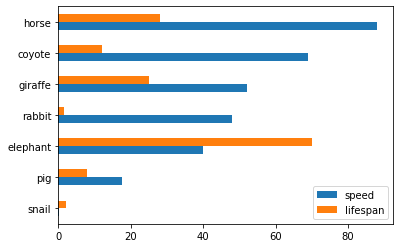

In [28]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']

kdf = ks.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index = index)

# Genera un gráfico de areas con kdf y matplotlib

ks.options.plotting.backend = 'matplotlib'
kdf.plot.barh()

<AxesSubplot:>

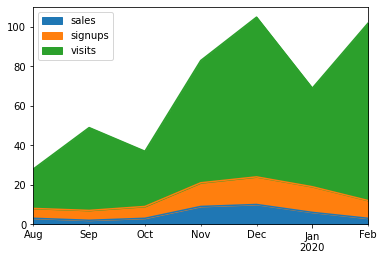

In [29]:
kdf = ks.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6, 3],
    'signups': [5, 5, 6, 12, 14, 13, 9],
    'visits': [20, 42, 28, 62, 81, 50, 90],
}, index=pd.date_range(start='2019/08/15', end='2020/03/09', freq='M'))

# Genera un gráfico de areas con kdf y matplotlib
kdf.plot.area()

### Utilizando SQL en Koalas

In [30]:
kdf = ks.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                   'pig': [20, 18, 489, 675, 1776],
                   'horse': [4, 25, 281, 600, 1900]})

In [36]:
# Con una consulta SQL selecciona los datos pig sea mayor que 100
ks.sql("SELECT * FROM {kdf} WHERE pig > 100")

,year,pig,horse
0,2003,489,281
1,2009,675,600
2,2014,1776,1900


In [32]:
pdf = pd.DataFrame({'year': [1990, 1997, 2003, 2009, 2014],
                   'sheep': [22, 50, 121, 445, 791],
                   'chicken': [250, 326, 589, 1241, 2118]})

In [37]:
# Haz un inner join entre kdf y pdf en la variable year, selecciona el pig y el chicken. Ordena los datos por pig y chicken
ks.sql('''
        SELECT ks.pig, pd.chicken
        FROM {kdf} ks INNER JOIN {pdf} pd
        ON ks.year = pd.year
        ORDER BY ks.pig, pd.chicken''')

,pig,chicken
0,18,326
1,20,250
2,489,589
3,675,1241
4,1776,2118


### Trabajando con PySpark

In [40]:
kdf = ks.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [10, 20, 30, 40, 50]})
# Convierte el DataFrame de Koalas a DataFrame de Spark
sdf = kdf.to_spark()
type(sdf)

pyspark.sql.dataframe.DataFrame

In [41]:
sdf.show()

+---+---+
|  A|  B|
+---+---+
|  1| 10|
|  2| 20|
|  3| 30|
|  4| 40|
|  5| 50|
+---+---+

